In [23]:
#!pip install koreanize-matplotlib

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#표를 csv파일로 만듬
path = pd.read_csv("./가구유형별소득소비지출현황.csv", encoding="ANSI")
path
df = pd.DataFrame(path)
df


,년도,가계수지항목,소비지출(천원),식료품·비주류음료,주류·담배,의류·신발,주거·수도·광열,가정용품·가사서비스,보건,교통,통신,오락·문화,교육,음식·숙박,기타상품서비스
0,2019,전체가구,2295,14.4,1.5,5.8,11.4,5.0,9.0,12.6,4.9,6.8,6.6,13.6,8.6
1,2019,1인가구,1308,13.5,2.2,5.0,18.2,4.8,9.0,12.2,4.0,6.4,1.8,15.0,8.0
2,2020,전체가구,2295,16.4,1.6,4.8,12.3,5.7,9.6,12.2,4.9,5.6,5.8,12.7,8.6
3,2020,1인가구,1268,15.2,2.2,4.6,19.3,4.7,9.6,10.5,4.3,5.8,1.2,15.1,7.5
4,2021,전체가구,2380,16.3,1.6,4.9,12.2,5.4,9.3,12.0,4.8,5.5,6.2,13.0,8.5
5,2021,1인가구,1361,15.0,2.3,4.6,18.9,4.8,9.0,10.6,4.3,5.9,1.3,16.0,7.9
6,2022,전체가구,2484,15.7,1.5,5.0,11.8,4.6,9.4,12.2,4.7,5.9,6.6,14.3,8.2
7,2022,1인가구,1461,14.2,2.1,4.9,18.1,4.4,9.1,10.9,4.1,6.3,1.5,17.0,7.7
8,2023,전체가구,2651,14.9,1.4,4.9,12.2,4.5,9.1,12.4,4.4,6.9,6.4,14.6,8.2
9,2023,1인가구,1557,13.6,2.1,4.9,18.3,4.1,8.9,10.9,3.9,7.1,1.5,16.7,8.0


In [25]:
ratio = df.copy()

In [26]:
ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년도          10 non-null     int64  
 1   가계수지항목      10 non-null     object 
 2   소비지출(천원)    10 non-null     int64  
 3   식료품·비주류음료   10 non-null     float64
 4   주류·담배       10 non-null     float64
 5   의류·신발       10 non-null     float64
 6   주거·수도·광열    10 non-null     float64
 7   가정용품·가사서비스  10 non-null     float64
 8   보건          10 non-null     float64
 9   교통          10 non-null     float64
 10  통신          10 non-null     float64
 11  오락·문화       10 non-null     float64
 12  교육          10 non-null     float64
 13  음식·숙박       10 non-null     float64
 14  기타상품서비스     10 non-null     float64
dtypes: float64(12), int64(2), object(1)
memory usage: 1.3+ KB


In [27]:
# ratio["년도"] = ratio["년도"].astype(object)

In [28]:
#전체가구의 소비지출 비율
total_expend = ratio[ratio["가계수지항목"]=="전체가구"]
total_gagu = ratio[ratio["가계수지항목"]=="전체가구"][["년도","소비지출(천원)"]]
# total_expend = total_gagu["소비지출(천원)"]
pd.DataFrame(total_gagu)

,년도,소비지출(천원)
0,2019,2295
2,2020,2295
4,2021,2380
6,2022,2484
8,2023,2651


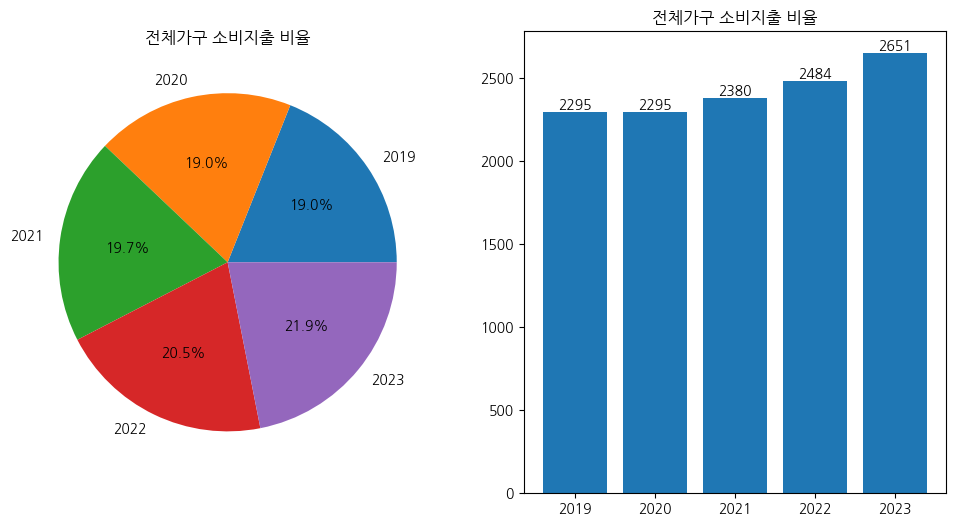

In [29]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.pie(total_gagu["소비지출(천원)"], labels=total_gagu["년도"], autopct='%1.1f%%')
# total_expend.plot(kind='pie', autopct='%1.1f%%\n', fontsize=12)  # 수정: autopct 형식과 fontsize를 조정하여 텍스트 크기 조절
plt.title('전체가구 소비지출 비율')

plt.subplot(1,2,2)
bars = plt.bar(total_gagu["년도"],total_gagu["소비지출(천원)"] )
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.title('전체가구 소비지출 비율')


plt.show()

In [30]:
total_food = ratio[ratio["가계수지항목"]=="전체가구"][["년도","식료품·비주류음료"]]
total_food


,년도,식료품·비주류음료
0,2019,14.4
2,2020,16.4
4,2021,16.3
6,2022,15.7
8,2023,14.9


In [31]:
condition = ratio[ratio["가계수지항목"]=="전체가구"]

In [32]:
year = total_gagu["년도"]
categories = condition[["식료품·비주류음료", '주류·담배', '의류·신발', '주거·수도·광열', '가정용품·가사서비스', '보건']]
categories

,식료품·비주류음료,주류·담배,의류·신발,주거·수도·광열,가정용품·가사서비스,보건
0,14.4,1.5,5.8,11.4,5.0,9.0
2,16.4,1.6,4.8,12.3,5.7,9.6
4,16.3,1.6,4.9,12.2,5.4,9.3
6,15.7,1.5,5.0,11.8,4.6,9.4
8,14.9,1.4,4.9,12.2,4.5,9.1


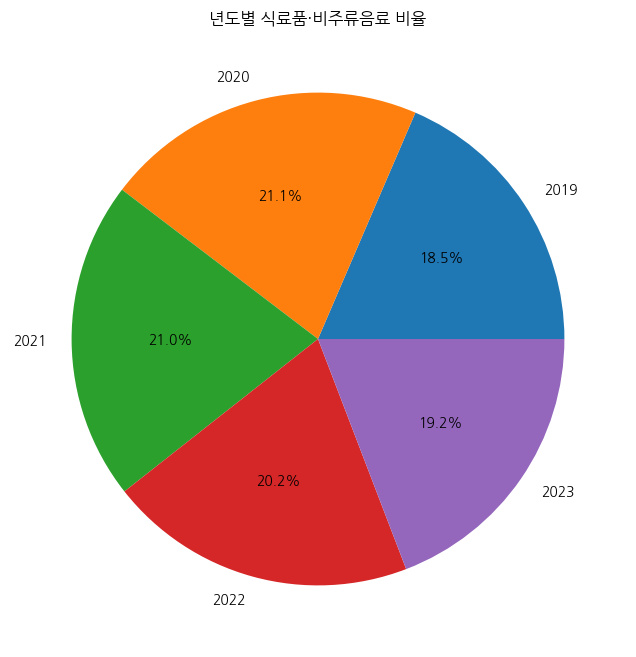

In [33]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # 수정: pandas import 수정

# 데이터
year = total_expend["년도"]
drink = total_expend["식료품·비주류음료"]

# 파이플롯 그리기
plt.figure(figsize=(8, 8))
plt.pie(drink, labels=year, autopct='%1.1f%%')
plt.title('년도별 식료품·비주류음료 비율')
plt.show()

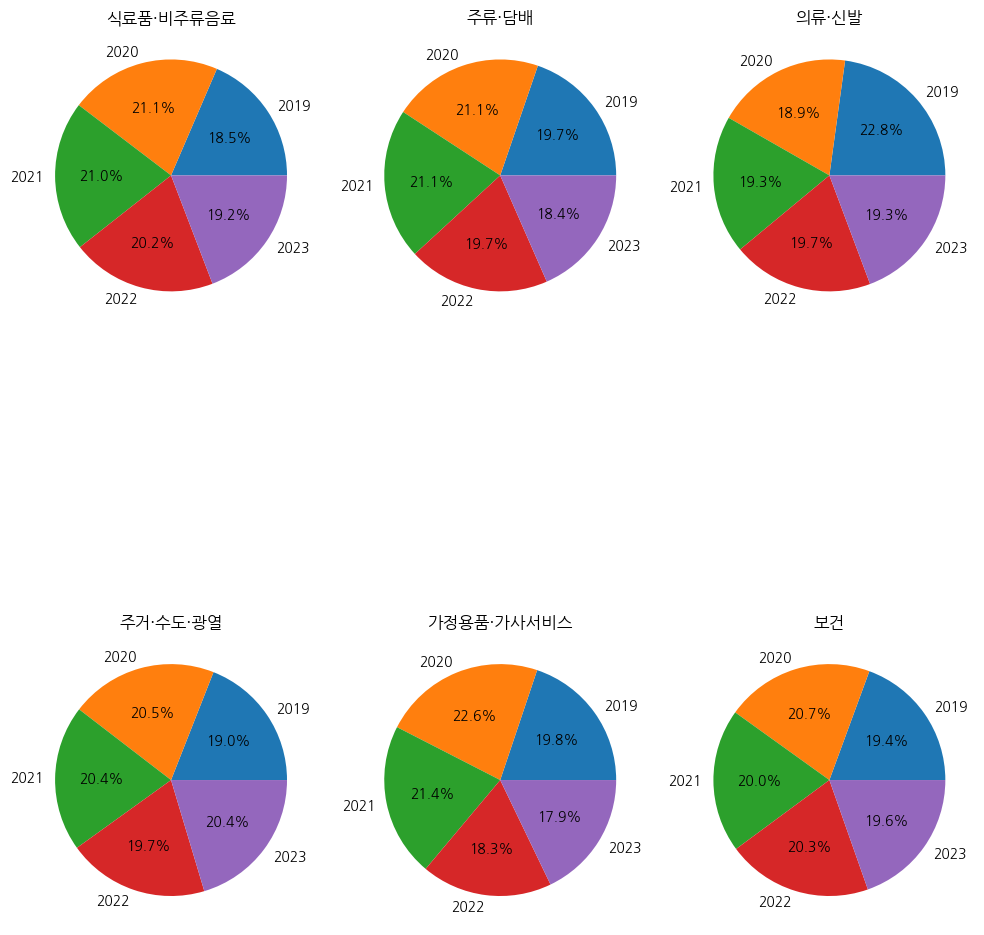

In [34]:
# 파이플롯 그리기
fig, axs = plt.subplots(2, 3, figsize=(10, 15))  # 2행 3열의 서브플롯

# 데이터별로 파이플롯 그리기
for i, category in enumerate(categories):
    row = i // 3  # 서브플롯의 행 인덱스
    col = i % 3   # 서브플롯의 열 인덱스
    ax = axs[row, col]  # 해당 위치의 서브플롯 선택
    ax.pie(condition[category], labels=year, autopct='%1.1f%%')
    ax.set_title(category)

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()

In [35]:
year = total_gagu["년도"]

categories_2 = condition[["교통","통신","오락·문화","교육","음식·숙박","기타상품서비스"]]
categories_2

,교통,통신,오락·문화,교육,음식·숙박,기타상품서비스
0,12.6,4.9,6.8,6.6,13.6,8.6
2,12.2,4.9,5.6,5.8,12.7,8.6
4,12.0,4.8,5.5,6.2,13.0,8.5
6,12.2,4.7,5.9,6.6,14.3,8.2
8,12.4,4.4,6.9,6.4,14.6,8.2


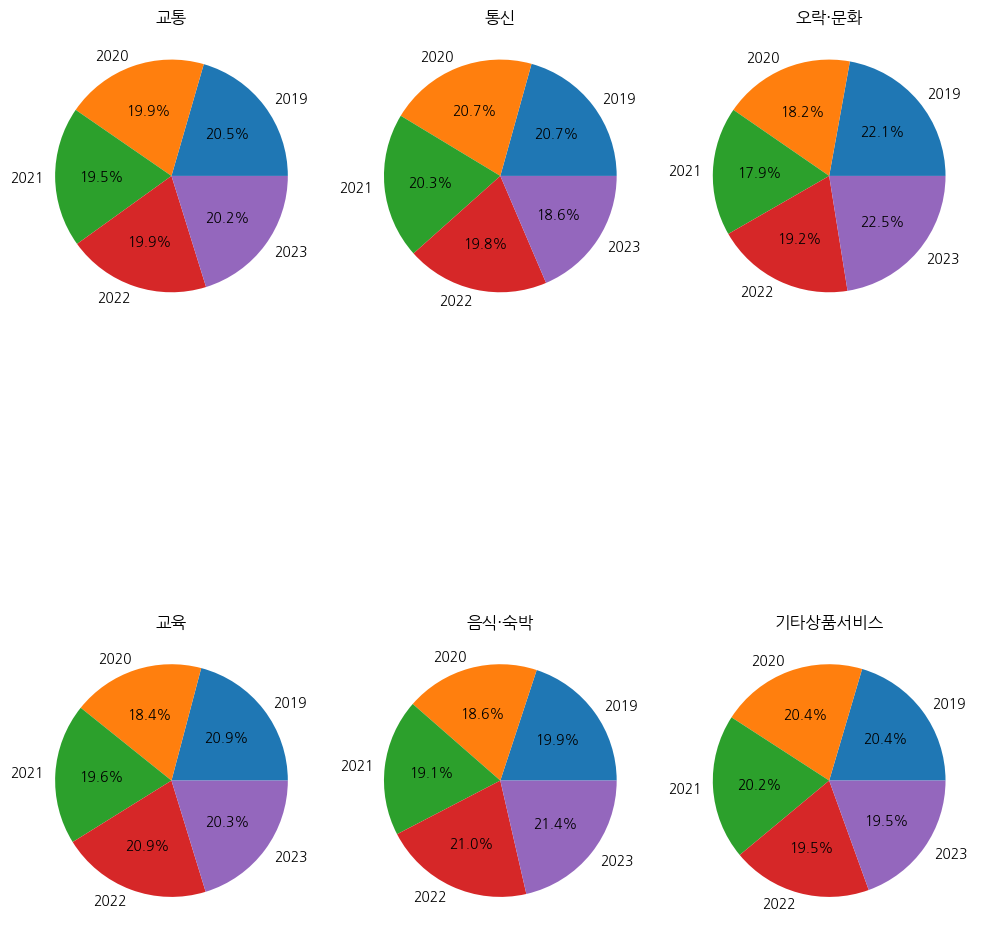

In [36]:
# 파이플롯 그리기
fig, axs = plt.subplots(2, 3, figsize=(10, 15))  # 2행 3열의 서브플롯

# 데이터별로 파이플롯 그리기
for i, category in enumerate(categories_2):
    row = i // 3  # 서브플롯의 행 인덱스
    col = i % 3   # 서브플롯의 열 인덱스
    ax = axs[row, col]  # 해당 위치의 서브플롯 선택
    ax.pie(condition[category], labels=year, autopct='%1.1f%%')
    ax.set_title(category)

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()

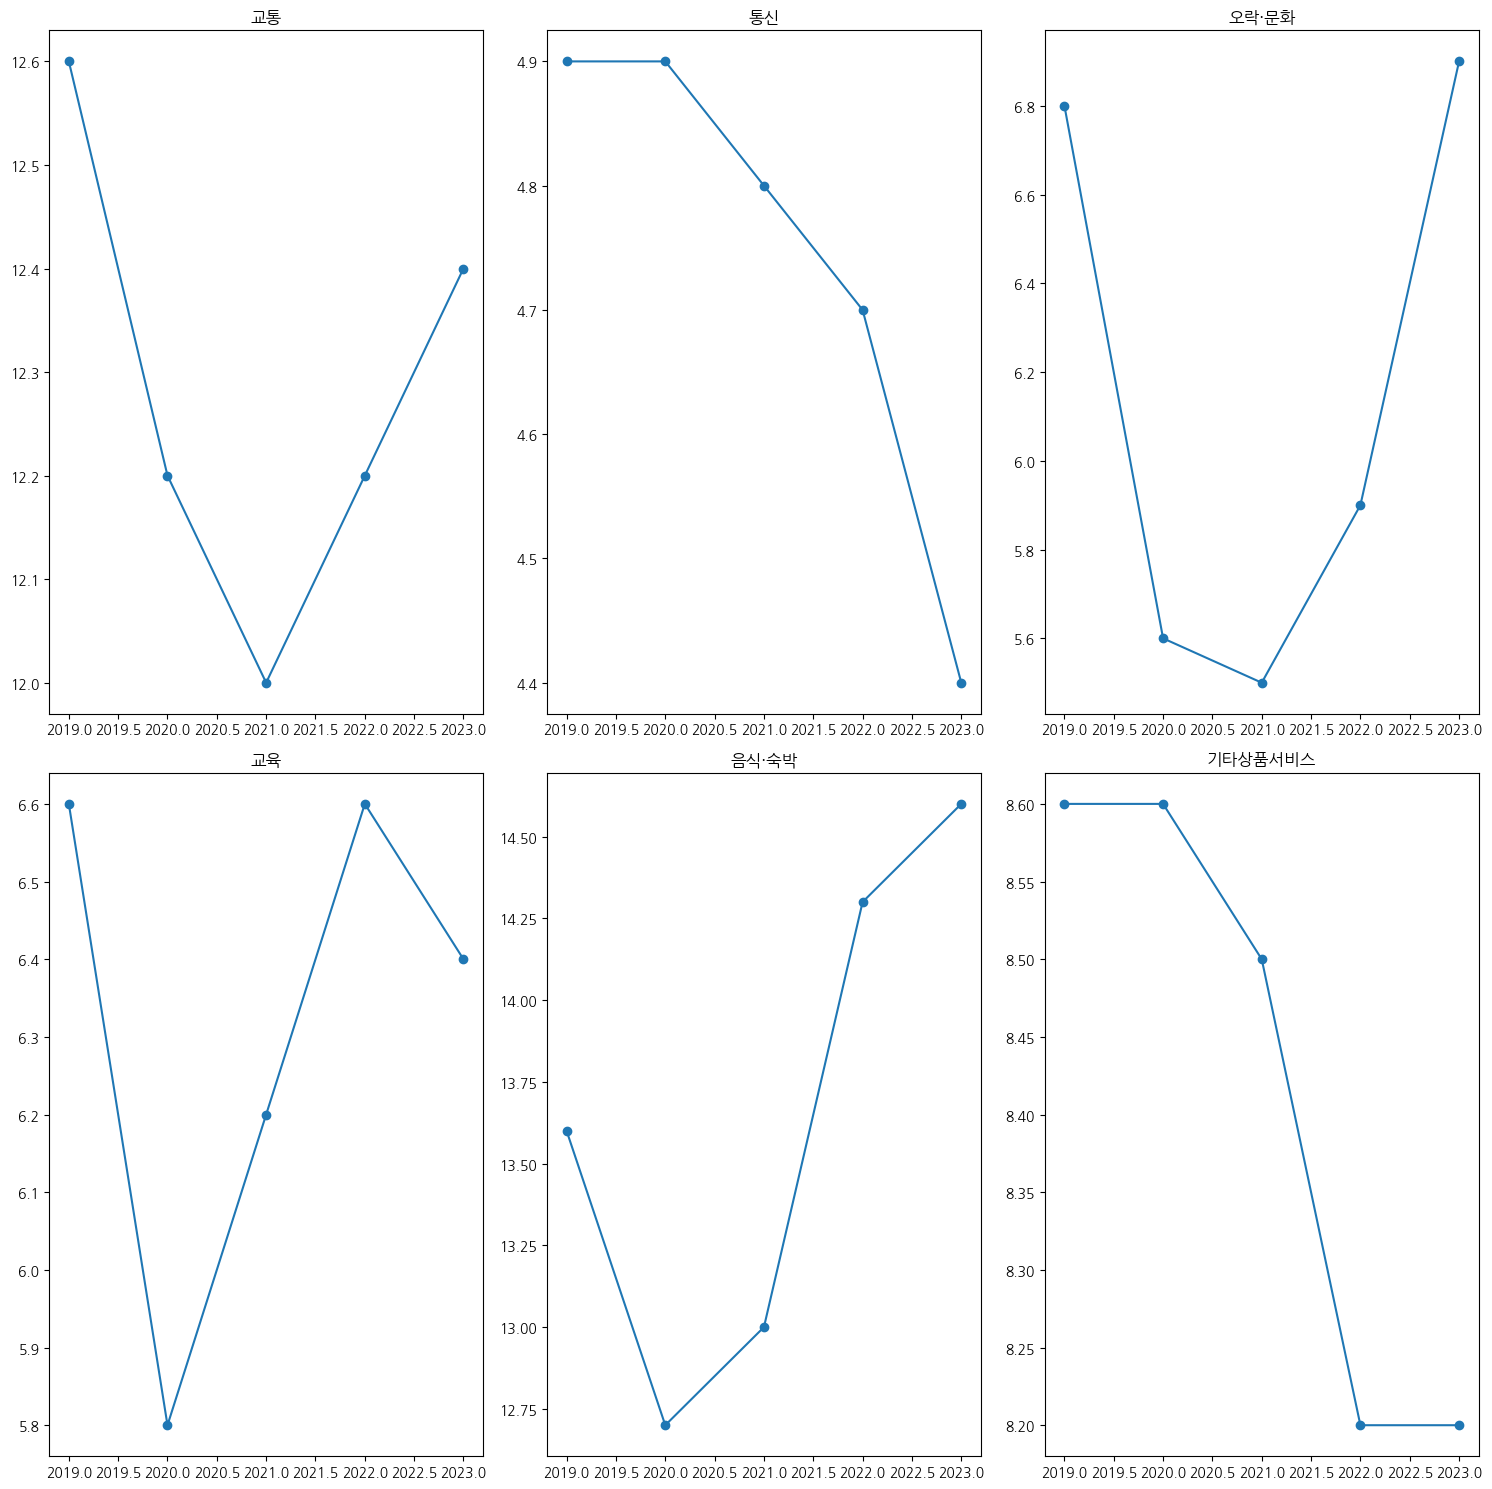

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))  # 2행 3열의 서브플롯

# 데이터별로 라인 플롯 그리기
for i, category in enumerate(categories_2):
    row = i // 3  # 서브플롯의 행 인덱스
    col = i % 3   # 서브플롯의 열 인덱스
    ax = axs[row, col]  # 해당 위치의 서브플롯 선택
    ax.plot(total_gagu["년도"], condition[category], marker='o', linestyle='-')  # 라인 플롯 그리기
    ax.set_title(category)

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()

In [38]:
single_expend = ratio[ratio["가계수지항목"]=="1인가구"]
single_gagu = single_expend[["년도","소비지출(천원)"]]
# total_expend = total_gagu["소비지출(천원)"]
pd.DataFrame(single_gagu)

,년도,소비지출(천원)
1,2019,1308
3,2020,1268
5,2021,1361
7,2022,1461
9,2023,1557


In [39]:
year_1 = single_expend["년도"]
condition_1 = single_expend[["식료품·비주류음료", '주류·담배', '의류·신발', '주거·수도·광열', '가정용품·가사서비스', '보건']]

print(year_1)
print(condition_1)


1    2019
3    2020
5    2021
7    2022
9    2023
Name: 년도, dtype: int64
   식료품·비주류음료  주류·담배  의류·신발  주거·수도·광열  가정용품·가사서비스   보건
1       13.5    2.2    5.0      18.2         4.8  9.0
3       15.2    2.2    4.6      19.3         4.7  9.6
5       15.0    2.3    4.6      18.9         4.8  9.0
7       14.2    2.1    4.9      18.1         4.4  9.1
9       13.6    2.1    4.9      18.3         4.1  8.9


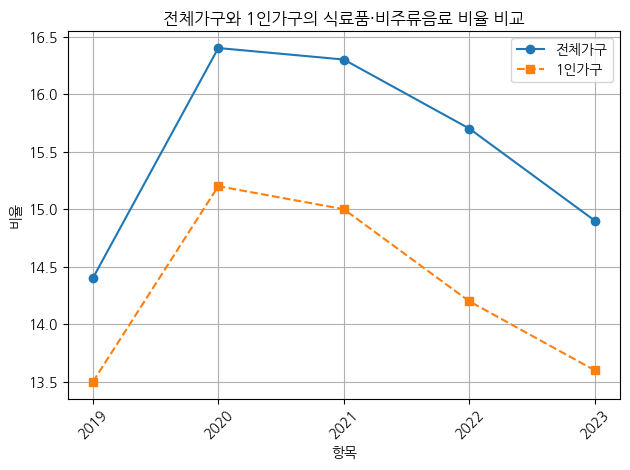

In [40]:
import matplotlib.pyplot as plt

# 전체가구와 1인가구의 "식료품·비주류음료" 데이터 추출
total_gagu_food = total_expend["식료품·비주류음료"]
single_gagu_food = single_expend["식료품·비주류음료"]

# 꺾은선 그래프 그리기
plt.plot(total_expend["년도"][:5], total_gagu_food, marker='o', label='전체가구')
plt.plot(single_expend["년도"][:5], single_gagu_food, marker='s', linestyle='--', label='1인가구')

# 그래프 제목과 축 레이블 설정
plt.title('전체가구와 1인가구의 식료품·비주류음료 비율 비교')
plt.xlabel('항목')
plt.ylabel('비율')
plt.xticks(total_expend["년도"][:5],rotation=45)  # x축 눈금 라벨 회전
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.tight_layout()  # 그래프 간격 조정

# 그래프 출력
plt.show()

In [41]:
categories = ["식료품·비주류음료", '주류·담배', '의류·신발', '주거·수도·광열', '가정용품·가사서비스', '보건']

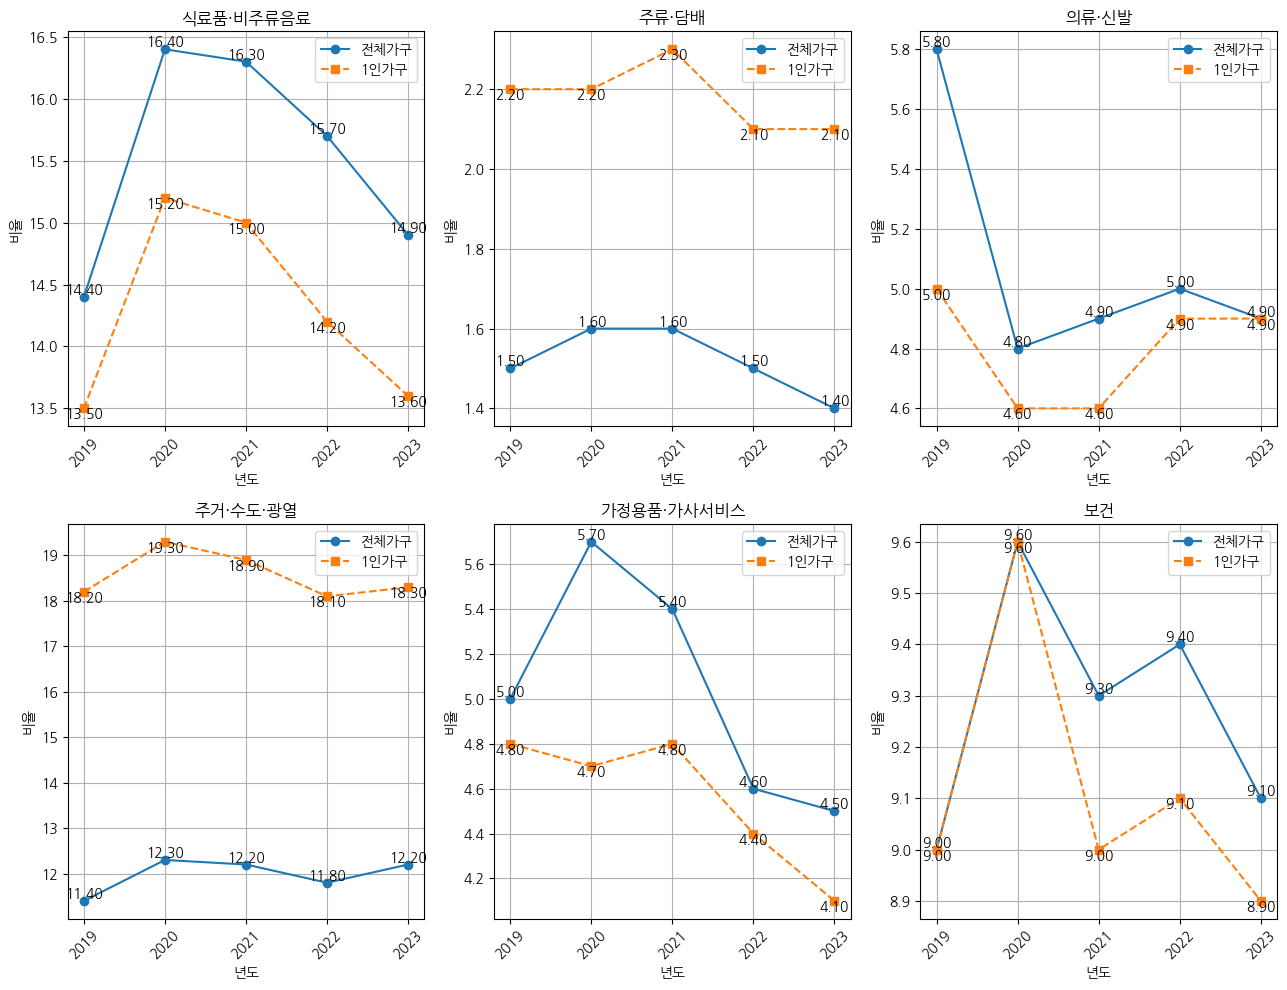

In [42]:
import matplotlib.pyplot as plt

# 전체가구와 1인가구의 소비 항목 비율 데이터 추출
total_gagu_expenses = total_expend[categories]
single_gagu_expenses = single_expend[categories]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(13, 10))

# 각 항목에 대한 꺾은선 그래프 그리기
for i, category in enumerate(categories):
    row = i // 3  # 서브플롯의 행 인덱스
    col = i % 3   # 서브플롯의 열 인덱스
    
    ax = axes[row, col]  # 해당 위치의 서브플롯 선택
    
    # 전체가구의 꺾은선 그래프 그리기
    ax.plot(total_expend["년도"], total_gagu_expenses[category], marker='o', label='전체가구')
    
    # 1인가구의 꺾은선 그래프 그리기
    ax.plot(single_expend["년도"], single_gagu_expenses[category], marker='s', linestyle='--', label='1인가구')
    
    ax.set_title(category)  # 서브플롯의 제목 설정
    ax.set_xlabel('년도')
    ax.set_ylabel('비율')
    ax.legend()  # 범례 표시
    ax.grid(True)  # 그리드 표시
    
    ax.set_xticks(total_expend["년도"][:5])
    ax.tick_params(axis='x', rotation=45)
    
    for year, total_value, single_value in zip(total_expend["년도"][:5], total_gagu_expenses[category][:5], single_gagu_expenses[category][:5]):
        ax.text(year, total_value, f'{total_value:.2f}', ha='center', va='bottom', fontsize=10)
        ax.text(year, single_value, f'{single_value:.2f}', ha='center', va='top', fontsize=10)

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()


In [43]:
categories_2 = ["교통","통신","오락·문화","교육","음식·숙박","기타상품서비스"]

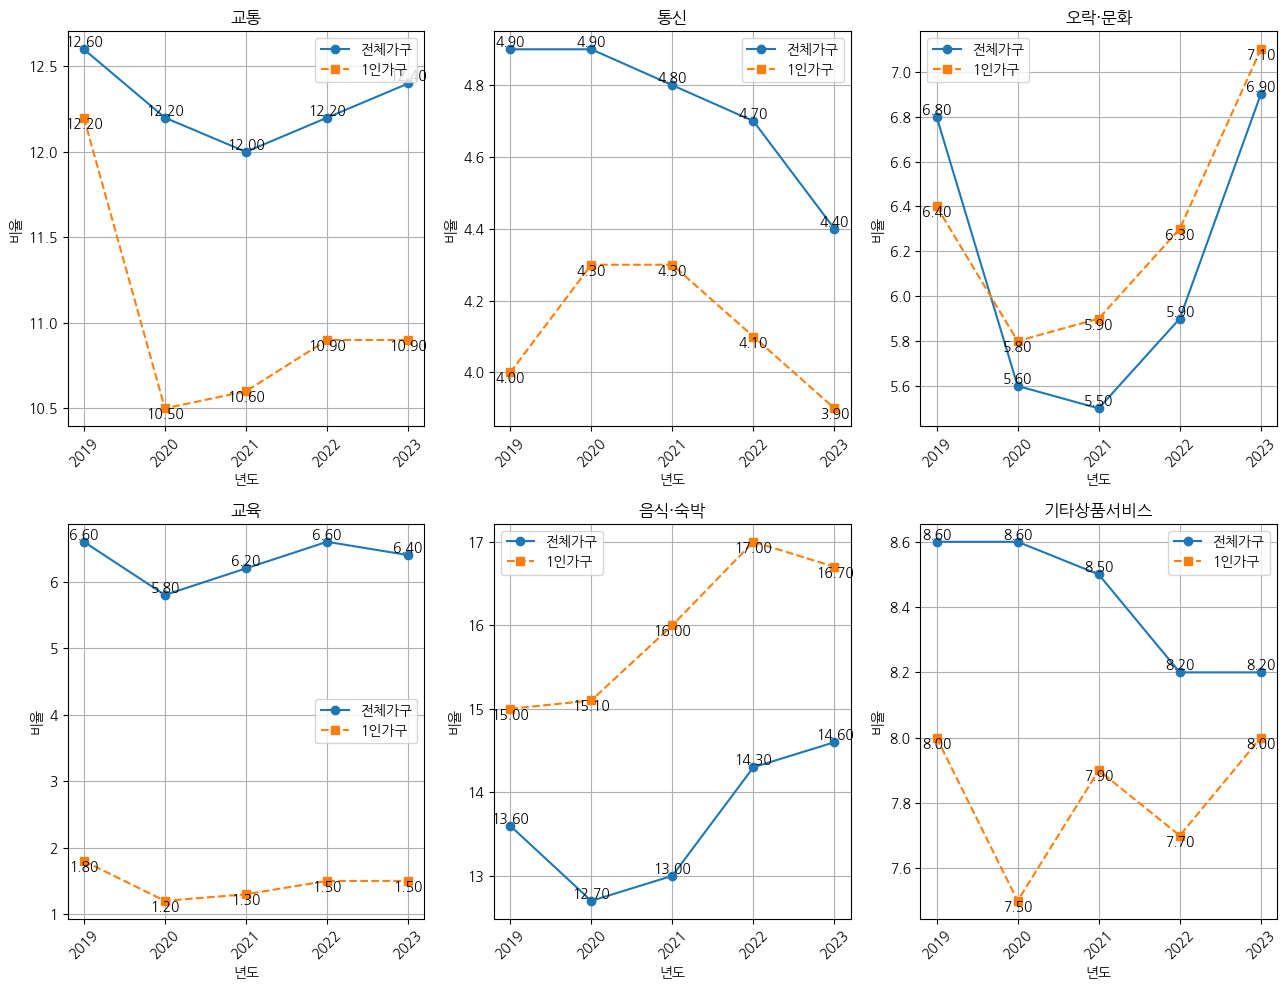

In [44]:
import matplotlib.pyplot as plt

# 전체가구와 1인가구의 소비 항목 비율 데이터 추출
total_gagu_expenses = total_expend[categories_2]
single_gagu_expenses = single_expend[categories_2]

# 그래프 그리기
fig, axes = plt.subplots(2, 3, figsize=(13, 10))

# 각 항목에 대한 꺾은선 그래프 그리기
for i, category in enumerate(categories_2):
    row = i // 3  # 서브플롯의 행 인덱스
    col = i % 3   # 서브플롯의 열 인덱스
    
    ax = axes[row, col]  # 해당 위치의 서브플롯 선택
    
    # 전체가구의 꺾은선 그래프 그리기
    ax.plot(total_expend["년도"], total_gagu_expenses[category], marker='o', label='전체가구')
    
    # 1인가구의 꺾은선 그래프 그리기
    ax.plot(single_expend["년도"], single_gagu_expenses[category], marker='s', linestyle='--', label='1인가구')
    
    ax.set_title(category)  # 서브플롯의 제목 설정
    ax.set_xlabel('년도')
    ax.set_ylabel('비율')
    ax.legend()  # 범례 표시
    ax.grid(True)  # 그리드 표시
    
    ax.set_xticks(total_expend["년도"][:5])
    ax.tick_params(axis='x', rotation=45)
    
    for year, total_value, single_value in zip(total_expend["년도"][:5], total_gagu_expenses[category][:5], single_gagu_expenses[category][:5]):
        ax.text(year, total_value, f'{total_value:.2f}', ha='center', va='bottom', fontsize=10)
        ax.text(year, single_value, f'{single_value:.2f}', ha='center', va='top', fontsize=10)

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()
